# MS/MS Analysis of Haloperidol

In [83]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import venn
import matplotlib.pyplot as plt

#### Venn diagram colors

In [43]:
default_colors = [
    # r, g, b, a
    [92, 192, 98, 0.5],
    [90, 155, 212, 0.5],
    [246, 236, 86, 0.6],
    [241, 90, 96, 0.4],
    [255, 117, 0, 0.3],
    [82, 82, 190, 0.2],
]
default_colors = [
    [i[0] / 255.0, i[1] / 255.0, i[2] / 255.0, i[3]]
    for i in default_colors
]

### Initialize variables

In [44]:
parentDTXSID = 'DTXSID4034150'
parentSMILES = 'c1cc(ccc1C(=O)CCCN2CCC(CC2)(c3ccc(cc3)Cl)O)F'
parentINCHIKEY = Chem.MolToInchiKey(Chem.MolFromSmiles(parentSMILES)) 
root_dir = r'L:\Lab\NCCT_ExpoCast\ExpoCast2020\SSA-Metabolism\CaseStudy\Haloperidol_CaseStudy'
MSMS_results = pd.read_csv(root_dir + r'\CFMID_Merged\MergedCFMIDResults.csv')

### Read-in feature list form MS1 analysis

In [45]:
featureList = pd.read_csv(root_dir + '\Filtered_features\FeatureList_subset.csv')
featureList['Formula'] = featureList['Formula'].apply(lambda x: x.rsplit('Esi')[0] if 'Esi' in x else x.rsplit('_mfg')[0] if '_mfg' in x else x)
featureKey = dict(zip(featureList['Formula'],featureList['Retention_Time']))

### Predicted/Reported Metabolites list

In [46]:
aggregatedMetabolites = pd.read_csv(root_dir + '\metabolite_masterList.csv')

In [47]:
aggregatedMetabolites = aggregatedMetabolites[aggregatedMetabolites['DTXSID'] == parentDTXSID]
aggregatedMetabolites

,DTXSID,Metabolite_INCHIKEY,ToolBox,Meteor,BioTransformer,TIMES_InVivo,TIMES_InVitro,SyGMa,CTS,Reported,Metabolite DTXSID,Markush
160,DTXSID4034150,IUPCCVUTZAKOGW-UHFFFAOYSA-N,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,False
161,DTXSID4034150,WUYWHIAAQYQKPP-UHFFFAOYSA-N,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
162,DTXSID4034150,UOBOSSRBVANWMD-UHFFFAOYSA-N,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,False
163,DTXSID4034150,QOGMGTGBNJSTQW-UHFFFAOYSA-N,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,False
164,DTXSID4034150,WNZBBTJFOIOEMP-UHFFFAOYSA-N,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,DTXSID80929321,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6761,DTXSID4034150,PYOCZQLGNLJDON-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,False
6762,DTXSID4034150,XUOQPNXGPIGLBV-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,False
6763,DTXSID4034150,YRGDGXWJSRZRAS-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,False
6764,DTXSID4034150,RVVAEJKFWAAGKL-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,False


### CFMID Identifications

In [48]:
MSMS_results

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
0,211.07639,DTXCID70356046,C11H14ClNO,CC(C)(C)NC(=O)C1=CC=CC=C1Cl,211.0767,0.029188,0.071188
1,211.07639,DTXCID601329782,C11H14ClNO,OC1=CC=C(Cl)C=C1CN1CCCC1,211.0767,0.056455,0.137689
2,211.07639,DTXCID10693225,C11H14ClNO,CC1=CC(NC(=O)C(C)(C)Cl)=CC=C1,211.0767,0.009696,0.023648
3,211.07639,DTXCID30273866,C11H14ClNO,CC1=CC=C(NC(=O)C(C)(C)Cl)C=C1,211.0767,0.010025,0.024449
4,211.07639,DTXCID80155163,C11H14ClNO,CC(C)NC(=O)C1=CC=C(CCl)C=C1,211.0767,0.052204,0.127321
...,...,...,...,...,...,...,...
464,551.17262,DTXCID001429695,C28H29N3O7S,NC(CCC(O)=NC(CSC1C(O)C2=CC3=CC=CC=C3C=C2C2=CC=...,551.1702,0.000605,0.001262
465,551.17262,DTXCID301429644,C28H29N3O7S,NC(CCC(O)=NC(CSC1C(O)C2=CC=CC=C2C2=CC3=CC=CC=C...,551.1702,0.000338,0.000706
466,551.17262,DTXCID001429645,C28H29N3O7S,NC(CCC(O)=NC(CSC1C=CC2=C(C=C3C=CC4=CC=CC=C4C3=...,551.1702,0.000484,0.001011
467,551.16610,DTXCID60365283,C27H29N5O4S2,CCCN1C(=O)C(C#N)=C(C)C(C=C2SC(=S)N(CC(O)=O)C2=...,551.1702,0.000185,0.000386


In [49]:
MSMS_results.describe()

,MASS,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
count,469.000000,469.000000,469.000000,469.000000
mean,271.371640,271.371275,0.121998,0.234277
std,80.997289,80.996666,0.146042,0.245924
min,211.074560,211.076700,0.000000,0.000000
25%,211.076390,211.076700,0.018048,0.052785
50%,211.077930,211.076700,0.056978,0.138966
75%,375.133140,375.138500,0.182032,0.347315
max,551.175790,551.170200,0.881747,1.000000


In [50]:
print('Num features in MSMS data: ' + str(len(MSMS_results['Feature_MASS'].unique())))

Num features in MSMS data: 8


In [51]:
MSMS_results.groupby(['Feature_MASS']).count()

,MASS,DTXCID,FORMULA,SMILES,energy_sum_MEDIAN,quotient_SCORE
Feature_MASS,,,,,,
211.0767,261,261,261,261,261,261
243.1812,50,50,50,50,50,50
353.0968,33,33,33,33,33,33
365.3639,4,4,4,4,4,4
375.1385,74,74,74,74,74,74
377.1536,34,34,34,34,34,34
431.2724,7,7,7,7,7,7
551.1702,6,6,6,6,6,6


In [52]:
MSMS_results.groupby(['Feature_MASS'])['MASS'].count().median()

33.5

In [53]:
MSMS_results[MSMS_results['quotient_SCORE'] >= 0.75].sort_values(by = ['Feature_MASS','quotient_SCORE'], ascending = False)

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE
463,551.17222,DTXCID30842935,C27H31ClFNO8,OC1C(O)C(OC2(CCN(CCCC(=O)C3=CC=C(F)C=C3)CC2)C2...,551.1702,0.479212,1.000000
456,431.26717,DTXCID70828930,C25H37NO5,CC(OC(C)=O)C1CCC2C3CCC4CC(CCC4(C)C3C(=O)N=CC12...,431.2724,0.022149,1.000000
457,431.26717,DTXCID601456597,C25H37NO5,CC12CCC3C(CCC4CC(CCC34C)OC(=O)CN)C1(O)CCC2C1=C...,431.2724,0.021727,0.980964
458,431.26717,DTXCID001449061,C25H37NO5,COC1=CC(=CC(OC)=C1OC)C(=O)OC1C(CN2CCCC2)C2CCC1...,431.2724,0.018537,0.836958
425,377.15578,DTXCID301358069,C21H25ClFNO2,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,377.1536,0.881747,1.000000
413,375.14013,DTXCID2014150,C21H23ClFNO2,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,375.1385,0.800995,1.000000
412,375.14013,DTXCID2014150,C21H23ClFNO2,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,375.1385,0.799988,0.998742
415,375.14013,DTXCID4083399,C21H23ClFNO2,OC1(CCN(CCCC(=O)C2=CC=CC=C2F)CC1)C1=CC=C(Cl)C=C1,375.1385,0.766500,0.956935
414,375.14013,DTXCID4083399,C21H23ClFNO2,OC1(CCN(CCCC(=O)C2=CC=CC=C2F)CC1)C1=CC=C(Cl)C=C1,375.1385,0.765048,0.955122
347,365.36577,DTXCID50566227,C24H47NO,CCCCCCCCCCCCN1CCCCCCCCCCCC1=O,365.3639,0.250577,1.000000


## Match MSMS predictions against known/predicted metabolites

In [54]:
MSMS_results['InchiKey'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in MSMS_results['SMILES']]
MSMS_results.drop_duplicates(subset = 'InchiKey', inplace = True)
MSMS_results['Predicted'] = [True if x in aggregatedMetabolites['Metabolite_INCHIKEY'].values else False for x in MSMS_results['InchiKey']]

In [55]:
predictedSubset = MSMS_results[MSMS_results['Predicted'] == True]
predictedSubset

,MASS,DTXCID,FORMULA,SMILES,Feature_MASS,energy_sum_MEDIAN,quotient_SCORE,InchiKey,Predicted
200,211.07639,DTXCID8031522,C11H14ClNO,OC1(CCNCC1)C1=CC=C(Cl)C=C1,211.0767,0.370228,0.902959,LZAYOZUFUAMFLD-UHFFFAOYSA-N,True
412,375.14013,DTXCID2014150,C21H23ClFNO2,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,375.1385,0.799988,0.998742,LNEPOXFFQSENCJ-UHFFFAOYSA-N,True
425,377.15578,DTXCID301358069,C21H25ClFNO2,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,377.1536,0.881747,1.000000,WNZBBTJFOIOEMP-UHFFFAOYSA-N,True
463,551.17222,DTXCID30842935,C27H31ClFNO8,OC1C(O)C(OC2(CCN(CCCC(=O)C3=CC=C(F)C=C3)CC2)C2...,551.1702,0.479212,1.000000,ZFNLYKVTHNLKNZ-UHFFFAOYSA-N,True


In [56]:
identificationDF = pd.DataFrame()
retentionKey = dict(zip(featureList['Formula'],featureList['Retention_Time']))
for idx, compound in predictedSubset.iterrows():
    rowDF = pd.DataFrame(data = {'Feature_Mass' : compound['Feature_MASS'],
                                 'Retention_Time': featureKey[compound['FORMULA']],
                                 'Identifier': compound['SMILES'],
                                 'Identifier_Level' : 'Structure - MS2',
                                 'InChIKey' : Chem.MolToInchiKey(Chem.MolFromSmiles(compound['SMILES'])),
                                 'Confidence' : '2b',
                                 'Formula_Score' : None,
                                 'MSMS_SimilarityScore' : compound['energy_sum_MEDIAN'],
                                 'MSMS_Q-Score' : compound['quotient_SCORE']}, index=[idx])
    identificationDF = identificationDF.append(rowDF)

In [57]:
identificationDF

,Feature_Mass,Retention_Time,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_SimilarityScore,MSMS_Q-Score
200,211.0767,4.815002,OC1(CCNCC1)C1=CC=C(Cl)C=C1,Structure - MS2,LZAYOZUFUAMFLD-UHFFFAOYSA-N,2b,None,0.370228,0.902959
412,375.1385,6.904999,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,Structure - MS2,LNEPOXFFQSENCJ-UHFFFAOYSA-N,2b,None,0.799988,0.998742
425,377.1536,6.636996,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,Structure - MS2,WNZBBTJFOIOEMP-UHFFFAOYSA-N,2b,None,0.881747,1.000000
463,551.1702,6.355999,OC1C(O)C(OC2(CCN(CCCC(=O)C3=CC=C(F)C=C3)CC2)C2...,Structure - MS2,ZFNLYKVTHNLKNZ-UHFFFAOYSA-N,2b,None,0.479212,1.000000


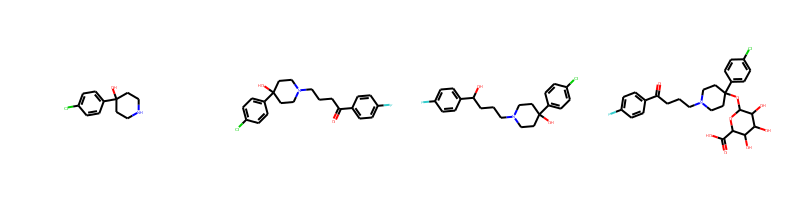

In [58]:
mols = []
for featureMass in predictedSubset['Feature_MASS'].unique():
    rows = predictedSubset[predictedSubset['Feature_MASS'] == featureMass]
    mols = mols + [Chem.MolFromSmiles(x) for x in rows['SMILES']]
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(200,200))
display(img)

In [59]:
for chem in predictedSubset['SMILES']:
    Draw.MolToFile(Chem.MolFromSmiles(chem), root_dir + '\Figures\MOLImage' +chem+ '.png')

## Find structures missed by CFMID but present in predictioned/reported suspect list and identified by MS1 labeling

In [60]:
missingFeatures_featureList = featureList[~featureList['Mass'].isin(identificationDF['Feature_Mass'])]
missingFeatures_featureList

,index,Feature_ID,Formula,Score,Mass,Retention_Time,BlankG00,BlankG01,BlankG02,Gluc00,...,Super42,BlankSub_Median_Super4,BlankSub_Max_Median_ALLSamples_Super4,Has_Adduct_or_Loss,Is_Adduct_or_Loss,Adduct_or_Loss_Info,Annotation_Source,Formula_Clean,KMeans,orderCat
2,66,1065,C21H18ClFNO,82.12,353.0968,7.003998,NaN,NaN,NaN,143277.0,...,476508.0,457785.0,457785.0,0,0,NaN,Suspect,C21H18ClFNO,9,1
3,475,373,C21H24ClFNO2,20.07,376.1423,0.977000,NaN,NaN,NaN,NaN,...,52522.0,231335.0,231335.0,0,0,NaN,Suspect,C21H24ClFNO2,9,1
6,12,179,C11H2NO2S2,61.15,243.9507,0.853000,NaN,NaN,NaN,99686.0,...,NaN,NaN,NaN,0,0,NaN,MFG,C11H2NO2S2,14,3
7,57,1115,C19H37N5O6,82.77,431.2724,4.953002,NaN,NaN,NaN,291360.0,...,295359.0,311876.0,311876.0,0,0,NaN,MFG,C19H37N5O6,12,3
8,474,396,C21H22NO5S,87.70,400.1219,0.993000,NaN,NaN,NaN,NaN,...,40582.0,45308.0,45308.0,0,0,NaN,MFG,C21H22NO5S,9,3
9,80,1076,C24H47NO,83.78,365.3639,12.148993,NaN,NaN,NaN,489979.0,...,442779.0,447690.0,447690.0,0,0,NaN,MFG,C24H47NO,12,3
10,138,982,C9H21N7O,85.44,243.1812,7.971002,NaN,NaN,NaN,990556.0,...,1375525.0,3321629.0,3321629.0,1,0,966(H2O);966(H2O);966(H2O);966(H2O);966(H2O);9...,MFG,C9H21N7O,9,3


In [61]:
allSus = pd.read_csv('L:\\Lab\\NCCT_ExpoCast\\ExpoCast2020\\SSA-Metabolism\\CaseStudy\\metabolite_masterList.csv')
allSus = allSus.fillna('None')
allSus = allSus[allSus['Parent_DTXSID'] == parentDTXSID]
allSus['Metabolite_INCHIKEY'] = [Chem.MolToInchiKey(Chem.MolFromSmiles(x)) for x in allSus['SMILES']]

In [62]:
allSus

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
687,DTXSID4034150,None,O=CCCC(=O)c1ccc(F)cc1,C10H9FO2,180.058658,False,True,1,0,1,1,0,IUPCCVUTZAKOGW-UHFFFAOYSA-N
688,DTXSID4034150,None,O=C(O)CCC(=O)c1ccc(F)cc1,C10H9FO3,196.053572,False,True,1,1,1,1,0,WUYWHIAAQYQKPP-UHFFFAOYSA-N
689,DTXSID4034150,None,O=C(O)CCC(O)c1ccc(F)cc1,C10H11FO3,198.069222,False,True,0,1,1,0,0,UOBOSSRBVANWMD-UHFFFAOYSA-N
690,DTXSID4034150,None,O=CCCC(O)c1ccc(F)cc1,C10H11FO2,182.074308,False,True,1,0,1,0,0,QOGMGTGBNJSTQW-UHFFFAOYSA-N
691,DTXSID4034150,DTXSID7057733,OC1(c2ccc(Cl)cc2)CCNCC1,C11H14ClNO,211.076392,False,True,1,1,1,1,1,LZAYOZUFUAMFLD-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,DTXSID4034150,None,O=S(=O)(O)Oc1cc(Cl)ccc1C1(O)CCNCC1,C11H14ClNO5S,307.028121,False,True,0,0,0,0,0,ORCPETHFZXGOJF-UHFFFAOYSA-N
834,DTXSID4034150,None,O=C(CCC(=O)c1ccc(F)cc1)OC1OC(C(=O)O)C(O)C(O)C1O,C16H17FO9,372.085660,False,True,0,0,0,1,0,PPYBYZRYCIBPTC-UHFFFAOYSA-N
835,DTXSID4034150,None,O=C(O)CNC(=O)CCC(=O)c1ccc(F)cc1,C12H12FNO4,253.075036,False,True,0,0,0,0,0,DHGAHKOXEVKCKD-UHFFFAOYSA-N
836,DTXSID4034150,None,O=C(CCCN1CCC(OS(=O)(=O)O)(c2ccc(Cl)cc2)CC1)c1c...,C21H23ClFNO5S,455.096950,False,True,0,0,0,0,0,BJJYBEASWQLRPD-UHFFFAOYSA-N


In [63]:
for idx, compound in missingFeatures_featureList.iterrows():
    formulaFilter = allSus['Formula'].str.contains(compound['Formula'])
    if sum(formulaFilter) == 1:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                 'Retention_Time': compound['Retention_Time'],
                                 'Identifier': allSus.loc[formulaFilter, 'SMILES'].values[0],
                                 'Identifier_Level' : 'Structure - MS1',
                                 'InChIKey' : allSus.loc[formulaFilter, 'Metabolite_INCHIKEY'].values[0],
                                 'Confidence' : '3',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        identificationDF = identificationDF.append(tmpDF)
    elif sum(formulaFilter) == 0:
        tmpDF = pd.DataFrame(data = {'Feature_Mass': compound['Mass'],
                                     'Retention_Time': compound['Retention_Time'],
                                 'Identifier': compound['Formula'],
                                 'Identifier_Level' : 'Formula',
                                 'InChIKey' :  None,
                                 'Confidence' : '4',
                                 'Formula_Score' : compound['Score'],
                                 'MSMS_Score' : None}, index=[idx])
        
        identificationDF = identificationDF.append(tmpDF)

In [64]:
identificationDF.sort_values(by = 'Confidence')

,Feature_Mass,Retention_Time,Identifier,Identifier_Level,InChIKey,Confidence,Formula_Score,MSMS_SimilarityScore,MSMS_Q-Score,MSMS_Score
200,211.0767,4.815002,OC1(CCNCC1)C1=CC=C(Cl)C=C1,Structure - MS2,LZAYOZUFUAMFLD-UHFFFAOYSA-N,2b,NaN,0.370228,0.902959,NaN
412,375.1385,6.904999,OC1(CCN(CCCC(=O)C2=CC=C(F)C=C2)CC1)C1=CC=C(Cl)...,Structure - MS2,LNEPOXFFQSENCJ-UHFFFAOYSA-N,2b,NaN,0.799988,0.998742,NaN
425,377.1536,6.636996,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,Structure - MS2,WNZBBTJFOIOEMP-UHFFFAOYSA-N,2b,NaN,0.881747,1.000000,NaN
463,551.1702,6.355999,OC1C(O)C(OC2(CCN(CCCC(=O)C3=CC=C(F)C=C3)CC2)C2...,Structure - MS2,ZFNLYKVTHNLKNZ-UHFFFAOYSA-N,2b,NaN,0.479212,1.000000,NaN
2,353.0968,7.003998,O=C(CCC[n+]1ccc(-c2ccc(Cl)cc2)cc1)c1ccc(F)cc1,Structure - MS1,KAPIKUHBALFONG-UHFFFAOYSA-N,3,82.12,NaN,NaN,NaN
3,376.1423,0.977000,OC(CCC[N+]1=CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC=C...,Structure - MS1,TVNNNRFMXOLHBK-UHFFFAOYSA-N,3,20.07,NaN,NaN,NaN
6,243.9507,0.853000,C11H2NO2S2,Formula,None,4,61.15,NaN,NaN,NaN
7,431.2724,4.953002,C19H37N5O6,Formula,None,4,82.77,NaN,NaN,NaN
8,400.1219,0.993000,C21H22NO5S,Formula,None,4,87.70,NaN,NaN,NaN
9,365.3639,12.148993,C24H47NO,Formula,None,4,83.78,NaN,NaN,NaN


In [65]:
allSus[allSus['Metabolite_INCHIKEY']=='KAPIKUHBALFONG-UHFFFAOYSA-N']

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
704,DTXSID4034150,DTXSID00154895,O=C(CCC[n+]1ccc(-c2ccc(Cl)cc2)cc1)c1ccc(F)cc1,C21H18ClFNO+,354.105547,False,True,0,1,0,0,1,KAPIKUHBALFONG-UHFFFAOYSA-N


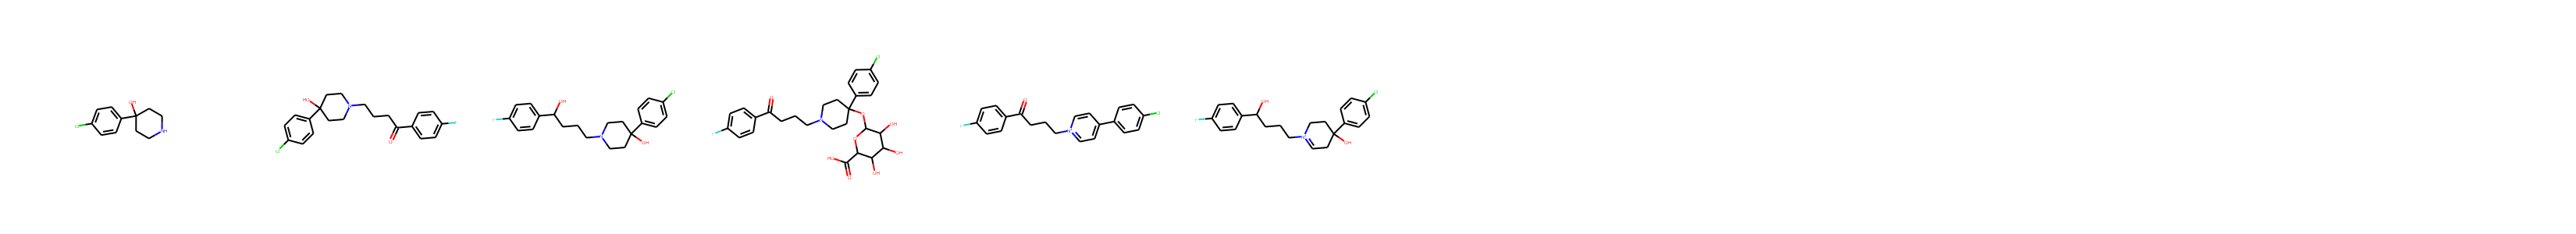

In [66]:
mols = []
for smiles in identificationDF['Identifier']:
    try:
        mols = mols + [Chem.MolFromSmiles(smiles)]
    except:
        continue
img = Draw.MolsToGridImage(mols, molsPerRow=len(mols), subImgSize=(300,300))
display(img)

In [67]:
matchedDF = allSus[(allSus['Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) | (allSus['Reported'] == 1)]
matchedDF

,Parent_DTXSID,Metabolite_DTXSID,SMILES,Formula,MW,Markush,DDA_Included,BioTransformer,Meteor,ToolBox,TIMES,Reported,Metabolite_INCHIKEY
691,DTXSID4034150,DTXSID7057733,OC1(c2ccc(Cl)cc2)CCNCC1,C11H14ClNO,211.076392,False,True,1,1,1,1,1,LZAYOZUFUAMFLD-UHFFFAOYSA-N
692,DTXSID4034150,DTXSID50473907,O=C(CCC[N+]1([O-])CCC(O)(c2ccc(Cl)cc2)CC1)c1cc...,C21H23ClFNO3,391.135049,False,True,1,1,1,0,1,LDKZFGVWYVWUSG-UHFFFAOYSA-N
704,DTXSID4034150,DTXSID00154895,O=C(CCC[n+]1ccc(-c2ccc(Cl)cc2)cc1)c1ccc(F)cc1,C21H18ClFNO+,354.105547,False,True,0,1,0,0,1,KAPIKUHBALFONG-UHFFFAOYSA-N
705,DTXSID4034150,DTXSID70747874,O=C(CCCN1CCC(OC2OC(C(=O)O)C(O)C(O)C2O)(c2ccc(C...,C27H31ClFNO8,551.172223,False,True,1,1,0,1,1,ZFNLYKVTHNLKNZ-UHFFFAOYSA-N
711,DTXSID4034150,DTXSID101025826,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=C(O)C=C...,C21H23ClFNO3,391.135049,True,True,1,0,0,0,1,KKKSAJSVALHFGG-UHFFFAOYSA-N
716,DTXSID4034150,DTXSID101025826,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC(O)=C...,C21H23ClFNO3,391.135049,True,True,1,0,0,0,1,BKFFKKAIXYEHRH-UHFFFAOYSA-N
817,DTXSID4034150,DTXSID4034150,O=C(CCCN1CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC=C(F)...,C21H23ClFNO2,375.140135,False,False,1,0,0,0,1,LNEPOXFFQSENCJ-UHFFFAOYSA-N
820,DTXSID4034150,None,OC(CCC[N+]1=CCC(O)(C2=CC=C(Cl)C=C2)CC1)C1=CC=C...,C21H24ClFNO2+,376.147411,False,False,1,0,0,0,0,TVNNNRFMXOLHBK-UHFFFAOYSA-N
837,DTXSID4034150,DTXSID80929321,OC(CCCN1CCC(O)(CC1)C1=CC=C(Cl)C=C1)C1=CC=C(F)C=C1,C21H25ClFNO2,377.155785,False,True,1,1,1,1,1,WNZBBTJFOIOEMP-UHFFFAOYSA-N


In [68]:
modelList = ['ToolBox', 'Meteor', 'BioTransformer', 'TIMES', 'Reported']

aggGroup = allSus[allSus['Parent_DTXSID'].isin(['DTXSID4034150'])]
performanceMap = pd.DataFrame(data = None, columns=['Model','Total','Unique','NTA_Match_Count'])
performanceMap['Model'] = modelList
performanceMap['Total'] = list(allSus[modelList].sum(axis=0))
performanceMap['Unique'] = [sum((allSus[match] == 1.0) & (allSus[modelList].sum(axis = 1) == 1)) for match in modelList]
performanceMap['NTA_Match_Count'] = [sum(allSus.loc[allSus[match] == 1,'Metabolite_INCHIKEY'].isin(identificationDF['InChIKey'])) for match in modelList]


In [69]:
performanceMap

,Model,Total,Unique,NTA_Match_Count
0,ToolBox,8,0,2
1,Meteor,19,8,4
2,BioTransformer,132,118,5
3,TIMES,7,1,3
4,Reported,8,0,5


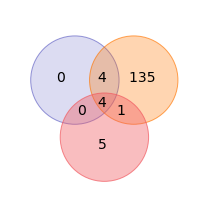

In [84]:
bt_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['BioTransformer'] > 0])
meteor_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Meteor'] > 0])
times_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['TIMES'] > 0])
tb_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['ToolBox'] > 0])

silico_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if (row['ToolBox'] > 0 or row['BioTransformer'] > 0 or row['Meteor'] > 0 or row['TIMES'] > 0)])
lit_venn = set([row['Metabolite_INCHIKEY'] for idx, row in allSus.iterrows() if row['Reported'] > 0])
vitro_venn = set([row['InChIKey'] if row['Identifier_Level'] != 'Formula' else row['Identifier'] for idx, row in identificationDF.iterrows() if row['InChIKey'] != parentINCHIKEY]) 

labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]],figsize = (3,3))
comp = 'Haloperidol'
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+'_GenOverlap.tiff', dpi = 300)

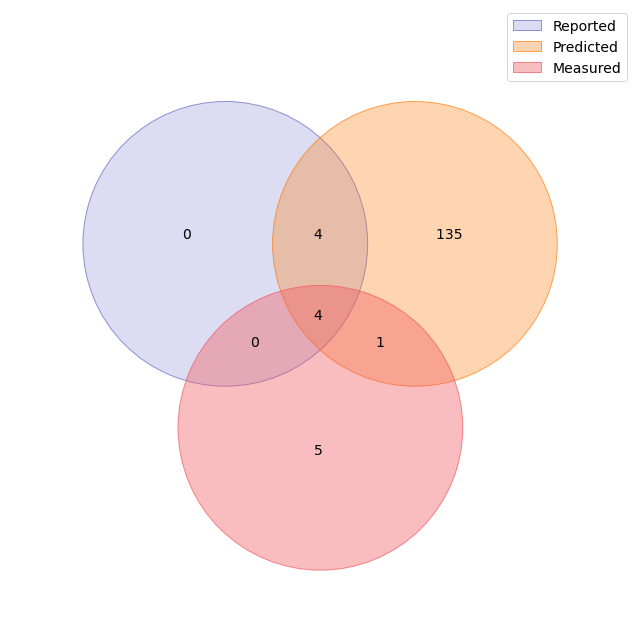

In [87]:
labels = venn.get_labels([lit_venn, silico_venn, vitro_venn])
fig, ax = venn.venn4(labels, names=['Reported', 'Predicted', 'Measured'], colors = [default_colors[-1], default_colors[-2],default_colors[-3]])
comp = 'Haloperidol'
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\LEGEND_Gen.tiff', dpi = 300)

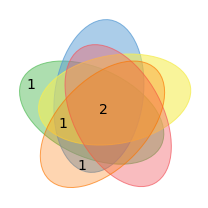

In [85]:
#Find overlapping metabolites 
bt_union = bt_venn.intersection(vitro_venn)
meteor_union = meteor_venn.intersection(vitro_venn)
times_union = times_venn.intersection(vitro_venn)
tb_union = tb_venn.intersection(vitro_venn)
lit_union = lit_venn.intersection(vitro_venn)

labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'], figsize = (3,3))
ax.get_legend().remove()
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\'+comp+r'_SilicoOverlap.tiff', dpi = 300)

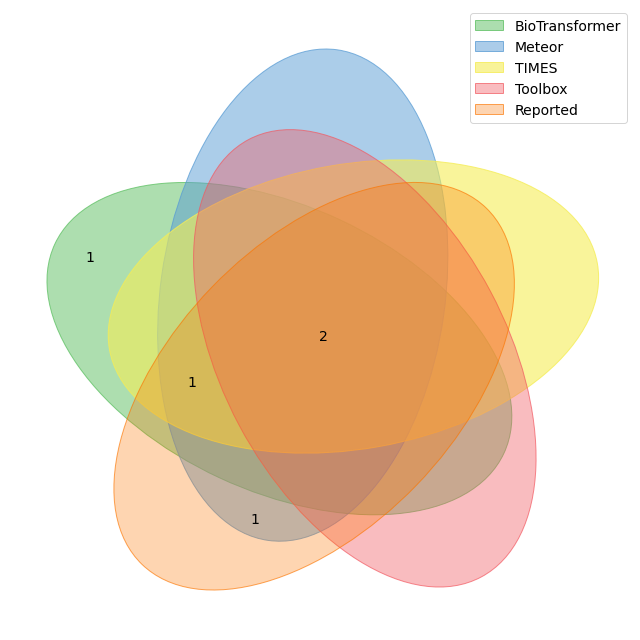

In [90]:
labels = venn.get_labels([bt_union, meteor_union, times_union, tb_union, lit_union],fill=['number'])
for k in labels:
    if labels[k] == '0 ':
        labels.update({k : ''})
fig, ax = venn.venn5(labels, names=['BioTransformer', 'Meteor', 'TIMES', 'Toolbox', 'Reported'])
plt.tight_layout()
fig.savefig(r'C:\Users\MBOYCE\OneDrive - Environmental Protection Agency (EPA)\Profile\Documents\\LEGEND_silico.tiff', dpi = 300)